In [29]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
# Load the dataset
data = pd.read_csv(r"C:\Users\bjaga\OneDrive\Desktop\New project\Gaming Analytics Dashboard Project\player_data.csv")  

In [33]:
# Inspect the data
print(data.head())

   player_id game_title  playtime_minutes  retention_days platform  \
0       8270     Game 7               205               8       PC   
1       1860     Game 7               475               3  Console   
2       6390     Game 3               320              14       PC   
3       6191    Game 10               271              28       PC   
4       6734    Game 10               428              13  Console   

          region  purchase_amount  
0  North America            61.40  
1           Asia            61.64  
2         Europe            45.74  
3         Europe            39.69  
4         Europe            45.54  


In [35]:
# Data Cleaning
data['playtime_hours'] = data['playtime_minutes'] / 60  # Convert playtime to hours
data.dropna(subset=['player_id', 'retention_days'], inplace=True)  # Drop missing values

In [37]:
# Calculate Metrics
average_playtime = data.groupby('game_title')['playtime_hours'].mean()
retention_rate = data.groupby('game_title')['retention_days'].mean()
player_count = data['player_id'].nunique()
print(f"Average Playtime:\n{average_playtime}")
print(f"Retention Rate:\n{retention_rate}")
print(f"Total Unique Players: {player_count}")

Average Playtime:
game_title
Game 1     5.254833
Game 10    5.367000
Game 2     5.293043
Game 3     5.117021
Game 4     5.319074
Game 5     5.551333
Game 6     4.900174
Game 7     5.538835
Game 8     5.102000
Game 9     5.137908
Name: playtime_hours, dtype: float64
Retention Rate:
game_title
Game 1     15.780000
Game 10    15.590000
Game 2     15.469565
Game 3     13.978723
Game 4     14.455556
Game 5     14.540000
Game 6     16.239583
Game 7     15.184466
Game 8     16.880000
Game 9     14.970588
Name: retention_days, dtype: float64
Total Unique Players: 947


In [39]:
# Save Processed Data for Tableau
processed_data = data.groupby('game_title').agg({
    'playtime_hours': 'mean',
    'retention_days': 'mean',
    'player_id': 'nunique'
}).rename(columns={'player_id': 'unique_players'})

processed_data.to_csv('processed_player_data.csv')
print("Processed data saved for Tableau visualization.")



Processed data saved for Tableau visualization.


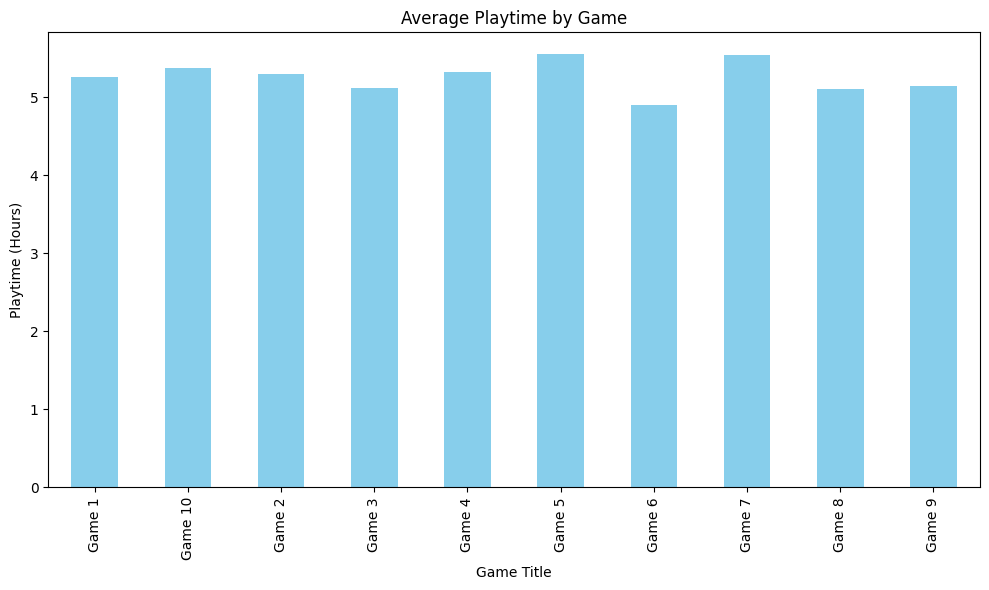

In [41]:
# Visualization in Python (Optional)
plt.figure(figsize=(10, 6))
average_playtime.plot(kind='bar', color='skyblue', title='Average Playtime by Game')
plt.xlabel('Game Title')
plt.ylabel('Playtime (Hours)')
plt.tight_layout()
plt.show()
